In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-data/heart_disease_data.csv


In [2]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_data.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
heart_data.shape


(303, 14)

In [5]:
 heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

une explication de chaque colonne dans votre dataset :

age: L'âge du patient en années.
sex: Le sexe du patient. (0 = femme, 1 = homme)
cp: Type de douleur thoracique ressentie par le patient. (Valeurs numériques)
trestbps: La pression artérielle au repos mesurée en mmHg (millimètres de mercure).
chol: Le taux de cholestérol sérique en mg/dl (milligrammes par décilitre).
fbs: Niveau de sucre dans le sang à jeun. (1 = supérieur à 120 mg/dl, 0 = autre)
restecg: Résultats de l'électrocardiogramme au repos. (Valeurs numériques)
thalach: Fréquence cardiaque maximale atteinte.
exang: Angine de poitrine induite par l'exercice. (1 = oui, 0 = non)
oldpeak: Dépression du segment ST induite par l'exercice par rapport au repos.
slope: La pente de l'onde ST pendant l'exercice.
ca: Nombre de grands vaisseaux (0-3) colorés par fluoroscopie.
thal: Résultat du test de stress cardiaque.
target: Maladie cardiaque (1 = Présence, 0 = Absence).

In [7]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
heart_data.duplicated().sum()

1

In [9]:
# Supposons que df soit votre DataFrame
# Si vous souhaitez vérifier les lignes en double sur toutes les colonnes
duplicated_rows = heart_data[heart_data.duplicated()]
duplicated_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
duplicated_rows = heart_data[ heart_data.duplicated(keep=False)]

# Afficher les lignes en double
duplicated_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


j'ai trouvé un doublons (les lignes 163 et 164)


pour suuprimer duclicate 
df_sans_doublons = df.drop_duplicates()

Afficher le DataFrame sans les doublons
print(df_sans_doublons)

In [21]:
heart_data_c= heart_data.drop_duplicates()
heart_data_c.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
heart_data_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [23]:
# checking the distribution of Target Variable
heart_data_c['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

## 1 = malade
## 0 = en bonne santé (sain)

In [24]:
##Crée une model de machine learning 

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [32]:
# . Division des données
X = heart_data_c.drop('target', axis=1)
y = heart_data_c['target']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 302
The length of the train dataset is   : 241
The length of the test dataset is    : 61


In [36]:
modelR = RandomForestClassifier()
modelR.fit(X_train, y_train)
modelR.score(X_train, y_train)
# And now we compare both scores :
print("\nScore for the Train dataset :", modelR.score(X_train, y_train))
print("Score for the Test dataset :", modelR.score(X_test, y_test))


Score for the Train dataset : 1.0
Score for the Test dataset : 0.8688524590163934


In [38]:
from sklearn.linear_model import LogisticRegression
modellR = LogisticRegression()
modellR.fit(X_train,y_train)
print("score d'exactitude(accuracy)LogisticRegression sur train :",modellR.score(X_train, y_train))
print("score d'exactitude(accuracy)LogisticRegression sur test :",modellR.score(X_test, y_test))

score d'exactitude(accuracy)LogisticRegression sur train : 0.8755186721991701
score d'exactitude(accuracy)LogisticRegression sur test : 0.8524590163934426


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# j'ai choisi logistique regession


In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = modellR.predict(X_test))   

array([[24,  5],
       [ 4, 28]])

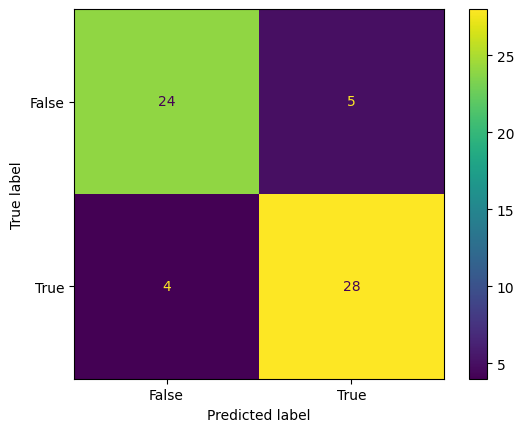

In [41]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y_test
predicted = modellR.predict(X_test)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, modellR.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



La première ligne correspond aux patients réellement malades (classe positive).

La deuxième ligne correspond aux patients réellement sains (classe négative).

La première colonne correspond aux patients prédits comme malades par le modèle.

La deuxième colonne correspond aux patients prédits comme sains par le modèle.

Voici comment interpréter chaque valeur de la matrice :

Vrais positifs (VP) : Il y a 24 patients réellement malades qui ont été correctement classés comme malades.
Faux positifs (FP) : Il y a 5 patients réellement sains qui ont été incorrectement classés comme malades.
Faux négatifs (FN) : Il y a 4 patients réellement malades qui ont été incorrectement classés comme sains.
Vrais négatifs (VN) : Il y a 28 patients réellement sains qui ont été correctement classés comme sains.
En résumé :

Le modèle a correctement identifié 24 patients comme malades et 28 patients comme sains.
Le modèle a incorrectement identifié 5 patients sains comme malades.
Le modèle a incorrectement identifié 4 patients malades comme sains.
